### PSC 204a	Fall 2015	Homework \#3
#### John Karasinski

#### 1) What is the formula for SE? What is the relation of SE with SD?  How are these two measures similar, how are they different?.

#### 2 ) All things being equal, what factors influence power? Why does it make sense that these factors influence power? Use the t-test formula to help explain why these factors logically influence power.

#### 3) Describe in your own words how z- and t-distributions are used to test null hypotheses. That is, what does the distribution represent, and how do qualities of the distribution help us evaluate differences between means?

#### 4) A researcher collected three large samples (N = 3,000 each) of undergraduate students from UC Davis, UC Merced, and UC Los Angeles; davis, merced, and la, respectively. The collective wisdom is that anxiety levels between campuses follow a normal distribution, but that some schools may elicit more or less anxiety in their undergraduate population. Your task is to compare these samples using independent samples t-tests. Specifically:

#### a. Gather mean, median, and SD summary statistics about these samples. Table your results. Using these summary statistics, does there appear to be a difference between campuses with respect to undergraduate anxiety?

In [47]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Load data
df = pd.read_csv('HW03data.csv')

# Reshape data, label columns
d = df.unstack().reset_index()
d.columns = ['campus', 'row_id', 'anxiety']
d = d[['campus', 'anxiety']]

# The dataframe now looks like this
print(d.head())
print(d.tail())

  campus   anxiety
0  davis -0.649487
1  davis  1.016753
2  davis -0.988380
3  davis  0.088452
4  davis -1.528078
     campus   anxiety
8995     la -1.277366
8996     la -2.337493
8997     la  0.740650
8998     la -0.970510
8999     la  2.878885


In [38]:
print(d.groupby('campus').anxiety.agg(['mean', 'median', 'std']))

                mean    median       std
campus                                  
davis  -4.222548e-17 -0.570450  1.749166
la     -5.037391e-03 -0.027617  1.749166
merced  5.036197e-04 -0.014975  1.596463


Based off these statistics, it appears that there are a few differences between the campuses. While the means of all three campuses are approximately zero, the median anxiety of the UCD students is very nonzero. This suggests that the distribution of UCD responses may be skewed. Aside from this, the standard deviation of the UCD and UCLA campuses is the same, the UC Merced value is slightly smaller. If the distributions are gaussian, this suggests that the UC Merced students' anxiety is more clustered around the mean. 

#### b. Conduct independent samples t-tests comparing each campus to the other. In a paragraph, summarize the results of the t-tests using APA format. You should report the statistical tests, interpret their meaning, and report your conclusions with respect to the research question. 
#### * In addition to APA formatted reporting of the t-test results, please include the 95% CI for each test. **Note: For those of you with more statistical experience do not worry about inflated type I error rates due to multiple t-tests; we’ll address this later in the quarter.

In [39]:
from scipy.stats import ttest_ind

def apa_format(res):
    if res['m1'] > 1.1 * res['m2']:
        comparison = 'more'
    elif res['m2'] > 1.1 * res['m1']:
        comparison = 'less'
    else:
        comparison = 'as'
    
    kwds = {'comparison': comparison, 'tn': res['n1'] + res['n2'] - 2}
    res.update(kwds)

    print('The students from UC {campus1} (M = {m1:.2f}, SD = {sd1:.2f}, N = {n1:.0f}) were {comparison} anxious '
          'than the students from UC {campus2} (M = {m2:.2f}, SD = {sd2:.2f}, N = {n2:.0f}), '
          't({tn:.0f}) = {tstatistic:.2f}, p < {p:.3f}, two-tailed. The 95% confidence interval around the '
          'difference between group means was ({low_95:.2f} to {high_95:.2f}).'.format(**res), end=' ')

def test(c1, c2):
    x_anxiety = d.query('campus == @c1').anxiety
    y_anxiety = d.query('campus == @c2').anxiety
    ttest = ttest_ind(x_anxiety, y_anxiety)
    
    md = x_anxiety.mean() - y_anxiety.mean()
    se = (x_anxiety.var()/len(x_anxiety) + 
          y_anxiety.var()/len(y_anxiety)) ** 0.5
    low_95, high_95 = md - 2 * se, md + 2 * se
    
    res = {'campus1': c1.title(), 'm1': x_anxiety.mean(), 'sd1': x_anxiety.std(), 'n1': len(x_anxiety),
           'campus2': c2.title(), 'm2': y_anxiety.mean(), 'sd2': y_anxiety.std(), 'n2': len(y_anxiety),
           'tstatistic': ttest.statistic, 'p': ttest.pvalue,
           'low_95': low_95, 'high_95': high_95}
    
    apa_format(res)

test('davis', 'la')
test('davis', 'merced')
test('la', 'merced')

The students from UC Davis (M = -0.00, SD = 1.75, N = 3000) were more anxious than the students from UC La (M = -0.01, SD = 1.75, N = 3000), t(5998) = 0.11, p < 0.911, two-tailed. The 95% confidence interval around the difference between group means was (-0.09 to 0.10). The students from UC Davis (M = -0.00, SD = 1.75, N = 3000) were less anxious than the students from UC Merced (M = 0.00, SD = 1.60, N = 3000), t(5998) = -0.01, p < 0.991, two-tailed. The 95% confidence interval around the difference between group means was (-0.09 to 0.09). The students from UC La (M = -0.01, SD = 1.75, N = 3000) were less anxious than the students from UC Merced (M = 0.00, SD = 1.60, N = 3000), t(5998) = -0.13, p < 0.898, two-tailed. The 95% confidence interval around the difference between group means was (-0.09 to 0.08). 

#### 5)   It’s useful to include a figure that depicts variable differences between groups. In this situation, there were two expectations: 1. that the average amount of anxiety differed between groups, and 2. that the distribution of student anxiety for each campus is normally distributed. To depict this create a single figure with 3 panels (3 rows and 1 column). Each panel should be a plot of the density of student anxiety. Make sure you generate a main heading, and x- and y-axis labels. Also, each of your final figures should have the same x-axis range and a dotted vertical line at the mean of each sample; this will help visualize comparisons between the campuses. Describe these distributions with respect to the two expectations in this study and your t-test results.

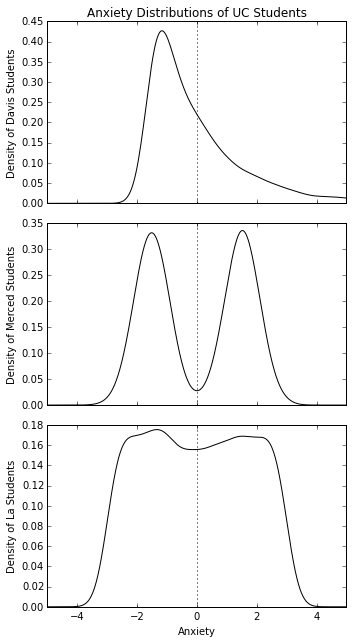

In [40]:
# Create the density plots
axs = df.plot(kind='kde',
              subplots=True, layout=(3, 1),
              figsize=(5, 9),
              xlim=(-5, 5),
              legend=False)[:, 0]

for i, col in enumerate(df):
    # Draw a verticle line at the means
    axs[i].axvline(df[col].mean(), color='k', linestyle='dotted')
    
    # Create some ylabels
    axs[i].set_ylabel('Density of {} Students'.format(col.title()))

# Set a title
axs[0].set_title('Anxiety Distributions of UC Students')
    
# Add a title
plt.xlabel('Anxiety')
plt.tight_layout()
plt.show()